# readDiag

In order to facilitate the access to the contents of the [Gridpoint Statistical Interpolation (GSI)](https://dtcenter.org/community-code/gridpoint-statistical-interpolation-gsi) diagnostic files, it has been written the [readDiag](https://github.com/GAD-DIMNT-CPTEC/readDiag) package wich is Fortran/Python interface that aims to read the GSI diagnostic binary files and create appropriate data structures to it. This Jupyter notebook is a simple walkthrough to its usage.

## Usage

In order to use the readDiag, first one need to load the `gsidiag` module from the readDiag package. This module can be loaded just like any other Python module:

In [1]:
import gsidiag as gd

With the module loaded, open a file containing the GSI diagnostic information. In this example, the file `diag_conv_01.2020031112` (with ~64 Mb) is a diagnostic file provided by the GSI containing information from conventional observations used in the minimization of a 3DVar cost function for the date 2020031112. This file is provided to the user for testing purposes only.

For this, we will create the object `file` from which we will use the builtin methods and functions of the readDiag.

**Note:** the `%%time` is a Jupyter magic command that accounts for the time a command takes to run and it is not required for the use of the readDiag).

To load the provided conventional diagnostic file, do as follows:

In [2]:
%%time

file = gd.read_diag('./data/diag_conv_01.2020031112')

CPU times: user 4.68 s, sys: 241 ms, total: 4.92 s
Wall time: 4.88 s


## List of built-in methods and functions

The readDiag package has several built-in methods and functions. To get a list of the available methods and functions, type `file.` and push the `<TAB>` button twice on the keyboard:

```python
>>> file.
file.close(      file.obsInfo     file.pfileinfo(  file.pvmap(      file.zlevs       
file.kxcount(    file.overview(   file.plot(       file.varNames    
file.obs         file.pcount(     file.ptmap(      file.vcount(
```

The built-in methos and functions have documentation which can be accessed using Python's docstrings by issuing the following command:

```python
print(object.function_name.__doc__)
```

## Retrieve file information 

Now, let's get the basic information contained inside the GSI conventional diagnostic file. The information are related to the binary file itself as well as the observations and its related contents. Use the method `pfileinfo()` to retrieve what observations and types of observations (`kx`) are available inside the file:

In [3]:
print(file.pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


In [4]:
file.pfileinfo()

Variable Name : ps
              └── kx => 181  180  120  187  183  

Variable Name : t
              └── kx => 181  180  120  187  183  130  126  

Variable Name : q
              └── kx => 181  120  187  180  183  

Variable Name : uv
              └── kx => 257  258  281  280  253  243  254  220  287  221  284  230  244  259  252  242  250  210  229  224  282  



Another way to retrieve the file content information is through the method `overview()`:

In [5]:
print(file.overview.__doc__)


        Creates a dictionary of the existing variables and types. Returns a Python dictionary.

        Usage: overview()
        


In [6]:
file.overview()

{'ps': [181, 180, 120, 187, 183],
 't': [181, 180, 120, 187, 183, 130, 126],
 'q': [181, 120, 187, 180, 183],
 'uv': [257,
  258,
  281,
  280,
  253,
  243,
  254,
  220,
  287,
  221,
  284,
  230,
  244,
  259,
  252,
  242,
  250,
  210,
  229,
  224,
  282]}

Another similar way to get a dictionary containing the basic information is by inspecting the attribute `obsInfo`:

In [7]:
file.obsInfo

{'ps':                   lat         lon    elev          prs     hgt   press   time  \
 kx  points                                                                      
 181 0      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -180.0   
     1      -70.760002   11.830000   123.0   958.400024   123.0   900.0    0.0   
     2      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0   60.0   
     3      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0    0.0   
     4      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -120.0   
 ...               ...         ...     ...          ...     ...     ...    ...   
 183 3732    66.529999  341.980011    17.0   987.400024    17.0   900.0 -180.0   
     3733    65.269997  346.420013    11.0   978.099976    11.0   900.0 -180.0   
     3734    49.430000  357.399994   102.0  1003.400024   102.0  1000.0 -120.0   
     3735    63.779999  341.929993    38.0   972.099976    38.0   900.0    0.0   
     3736 

Note that the previous command returned a dictionary with all the information for all the available observations and types. To filter out these information by the observations, you may use the following commands:

In [8]:
file.obsInfo.keys()

dict_keys(['ps', 't', 'q', 'uv'])

In [9]:
file.obsInfo['ps']

lat         lon    elev          prs     hgt   press   time  \
kx  points                                                                      
181 0      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -180.0   
    1      -70.760002   11.830000   123.0   958.400024   123.0   900.0    0.0   
    2      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0   60.0   
    3      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0    0.0   
    4      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -120.0   
...               ...         ...     ...          ...     ...     ...    ...   
183 3732    66.529999  341.980011    17.0   987.400024    17.0   900.0 -180.0   
    3733    65.269997  346.420013    11.0   978.099976    11.0   900.0 -180.0   
    3734    49.430000  357.399994   102.0  1003.400024   102.0  1000.0 -120.0   
    3735    63.779999  341.929993    38.0   972.099976    38.0   900.0    0.0   
    3736    66.529999  341.980011    17.0   988.900024    17.0   900.0    0.0   

            idqc  iuse  iusev     wpbqc       inp_err       adj_err  \
kx  points                                                            
181 0        2.0   1.0    0.0  3.893471  1.000000e+00  1.000000e+00   
    1        2.0   1.0    0.0  3.999395  1.000000e+00  1.000000e+00   
    2        2.0   1.0    0.0  3.912592  1.000000e+00  1.000000e+00   
    3        2.0   1.0    0.0  3.874233  1.000000e+00  1.000000e+00   
    4        2.0   1.0    0.0  3.871676  1.000000e+00  1.000000e+00   
...          ...   ...    ...       ...           ...           ...   
183 3732     9.0  -1.0  101.0  3.999699  1.000000e-11  1.000000e-11   
    3733     9.0  -1.0  101.0  3.999699  1.000000e-11  1.000000e-11   
    3734     9.0  -1.0  101.0  3.999699  1.000000e-11  1.000000e-11   
    3735     9.0  -1.0  101.0  3.999699  1.000000e-11  1.000000e-11   
    3736     9.0  -1.0  101.0  3.999699  1.000000e-11  1.000000e-11   

                  inverr           oer          obs       omf  \
kx  points                                                      
181 0       2.296368e-01  4.354702e+00   824.900024  3.434075   
    1       4.926434e-01  2.029866e+00   958.400024 -1.181676   
    2       2.499149e-01  4.001361e+00   824.900024  3.374524   
    3       2.483187e-01  4.027082e+00   824.900024  3.483506   
    4       2.286168e-01  4.374131e+00   824.900024  3.489466   
...                  ...           ...          ...       ...   
183 3732    1.000000e-11  1.000000e+11   987.400024  0.497376   
    3733    1.000000e-11  1.000000e+11   978.099976 -2.292868   
    3734    1.000000e-11  1.000000e+11  1003.400024  0.943315   
    3735    1.000000e-11  1.000000e+11   972.099976 -2.327267   
    3736    1.000000e-11  1.000000e+11   988.900024  0.669521   

                              geometry  
kx  points                              
181 0        POINT (2.52000 -72.00000)  
    1       POINT (11.83000 -70.76000)  
    2        POINT (2.52000 -72.00000)  
    3        POINT (2.52000 -72.00000)  
    4        POINT (2.52000 -72.00000)  
...                                ...  
183 3732    POINT (-18.02002 66.53000)  
    3733    POINT (-13.57996 65.27000)  
    3734     POINT (-2.59998 49.43000)  
    3735    POINT (-18.07001 63.78000)  
    3736    POINT (-18.02002 66.53000)  

[86479 rows x 18 columns]

Note that the outcome of the command `file.obsInfo['ps']` returned a Pandas dataframe (acctually a multiindex dataframe) with all the information related with the `ps` (surface pressure) observation. More information on how to handle the dataframe and filter out some information are given on the next sections.

Use the attribute `varNames` to get a list of the variable names from the file:

In [10]:
file.varNames

['ps', 't', 'q', 'uv']

Another way to get the list of variables is by using some of the Pandas methods:

In [11]:
file.obs.groupby(level=0).size().sort_values(ascending=False).keys()

Index(['uv', 't', 'q', 'ps'], dtype='object')

To get a list of the available standard vertical levels, use the attribute `zlevs`:

In [12]:
file.zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

## Data exploration

On the previous section it has been given an overview about the functions and methods of the readDiag package. In this section, it is given an overview of how to handle the Pandas dataframe in order to retrive and filter out some information related to the observations from the provided conventionan diagnostic file. 

To simply count the number of records of some kind of observation, use the function `pcount()`. This method returns a histogram with the count of kinds (i.e., `kx`) of a given observation:

In [13]:
print(file.pcount.__doc__)


        Plots a histogram of the desired variable and types.

        Usage: pcount(VarName)
        


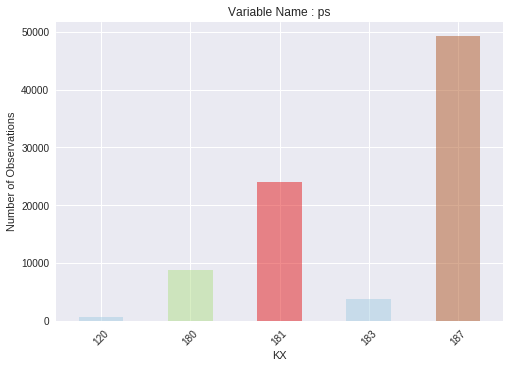

In [14]:
file.pcount('ps')

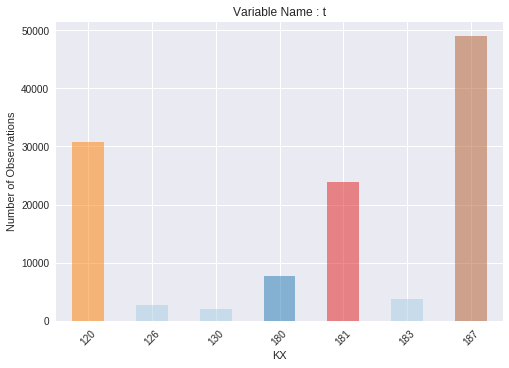

In [15]:
file.pcount('t')

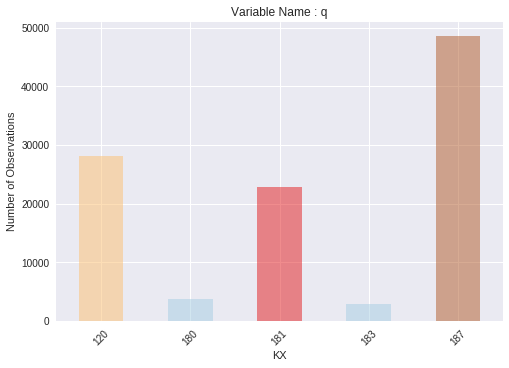

In [16]:
file.pcount('q')

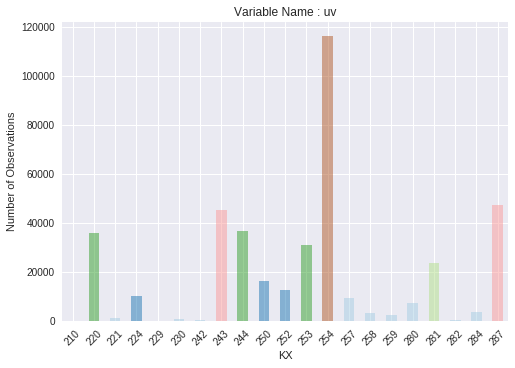

In [17]:
file.pcount('uv')

### Dataframe exploration

The Pandas dataframe is a tabular data structure with its own built in functions and methods. This section shows some generic operations related to it.

Previously, we learned that the method `obsInfo` returns a dictionary with one DataFrame for each observation, e.g., for the `t` (temperature) observation:

In [18]:
file.obsInfo['t']

lat        lon    elev         prs     hgt  press   time  \
kx  points                                                                   
181 0      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0 -180.0   
    1      -70.760002   11.83000   123.0  958.400024   123.0  900.0    0.0   
    2      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0   60.0   
    3      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0    0.0   
    4      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0 -120.0   
...               ...        ...     ...         ...     ...    ...    ...   
126 2640    39.709999  280.98999   763.0  879.000000  1183.0  800.0   90.0   
    2641    39.709999  280.98999   763.0  872.099976  1247.0  800.0   90.0   
    2642    39.709999  280.98999   763.0  865.299988  1312.0  800.0   90.0   
    2643    39.709999  280.98999   763.0  858.500000  1376.0  800.0   90.0   
    2644    39.709999  280.98999   763.0  851.700012  1441.0  800.0   90.0   

            idqc  iuse  iusev     wpbqc       inp_err       adj_err  \
kx  points                                                            
181 0        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    1        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    2        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    3        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    4        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
...          ...   ...    ...       ...           ...           ...   
126 2640     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2641     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2642     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2643     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2644     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   

                  inverr           oer         obs        omf  \
kx  points                                                      
181 0       9.090909e-12  1.100000e+11  257.250000  10.005481   
    1       9.090909e-12  1.100000e+11  263.350006   8.443922   
    2       9.090909e-12  1.100000e+11  257.149994   7.287628   
    3       9.090909e-12  1.100000e+11  257.350006   7.147639   
    4       9.090909e-12  1.100000e+11  257.850006   9.619534   
...                  ...           ...         ...        ...   
126 2640    1.000000e-17  1.000000e+17  278.750000  -0.777656   
    2641    1.000000e-17  1.000000e+17  277.850006  -1.536891   
    2642    1.000000e-17  1.000000e+17  277.950012  -1.106795   
    2643    1.000000e-17  1.000000e+17  277.649994  -1.074093   
    2644    1.000000e-17  1.000000e+17  278.250000  -0.125823   

                              geometry  
kx  points                              
181 0        POINT (2.52000 -72.00000)  
    1       POINT (11.83000 -70.76000)  
    2        POINT (2.52000 -72.00000)  
    3        POINT (2.52000 -72.00000)  
    4        POINT (2.52000 -72.00000)  
...                                ...  
126 2640    POINT (-79.01001 39.71000)  
    2641    POINT (-79.01001 39.71000)  
    2642    POINT (-79.01001 39.71000)  
    2643    POINT (-79.01001 39.71000)  
    2644    POINT (-79.01001 39.71000)  

[119806 rows x 18 columns]

This dataframe is multiindex, i.e., a tabular data structure with multiple indices. The indices can be retrieve issuing the command:

In [19]:
file.obsInfo['t'].index.names

FrozenList(['kx', 'points'])

The `kx` and `points` are the indices for whose all the columns of the dataframe are defined. This means that for a given observation, there are a number of `kx` (observation kinds) and `points` (the index of each point related to that observation kind).

**Note:** although the `points` index each observation, its real world lat/lon coordinate is given by the column `geometry` (which is a tuple formed by the `lat` and `lon` columns).

In order to simplify the use of some commands, we will create the variable `df_t` which will hold the temperature observation dataframe:

In [20]:
df_t = file.obsInfo['t']

The temperature observation has the following kinds:

In [21]:
df_t.index.get_level_values('kx').unique()

Int64Index([181, 180, 120, 187, 183, 130, 126], dtype='int64', name='kx')

If you want to filter all the temperature observations by the kind 120, you may issue the command:

In [22]:
df_t.iloc[df_t.index.get_level_values('kx') == 120]

lat         lon    elev    prs           hgt  press  \
kx  points                                                              
120 0      -30.670000   24.000000  1287.0  871.0  1.287000e+03  800.0   
    1      -30.670271   23.999821  1287.0  867.0  1.000000e+11  800.0   
    2      -30.671200   23.999109  1287.0  855.0  1.000000e+11  800.0   
    3      -30.671721   23.998690  1287.0  850.0  1.508000e+03  800.0   
    4      -30.675381   23.996031  1287.0  819.0  1.000000e+11  800.0   
...               ...         ...     ...    ...           ...    ...   
    30751   76.829857  349.991333    14.0    5.8  1.000000e+11    0.0   
    30752   76.822647  350.371216    14.0    5.1  1.000000e+11    0.0   
    30753   76.809792  350.601929    14.0    4.7  1.000000e+11    0.0   
    30754   76.791122  350.984192    14.0    4.1  1.000000e+11    0.0   
    30755   76.788818  351.063171    14.0    4.0  1.000000e+11    0.0   

                 time  idqc  iuse  iusev     wpbqc   inp_err   adj_err  \
kx  points                                                               
120 0      -45.000000   2.0   1.0    0.0  3.999999  1.250000  0.980566   
    1      -44.865601   2.0   1.0    0.0  3.850856  1.250000  0.849141   
    2      -44.461800   2.0   1.0    0.0  3.989482  1.250000  0.880636   
    3      -44.263199   2.0   1.0    0.0  3.991446  1.250000  1.004662   
    4      -43.195198   2.0   1.0    0.0  3.996317  1.250000  1.250000   
...               ...   ...   ...    ...       ...       ...       ...   
    30751   55.483200   2.0   1.0    0.0  3.999999  0.666667  0.489252   
    30752   58.462799   2.0   1.0    0.0  3.999996  0.666667  0.555556   
    30753   60.394798   2.0   1.0    0.0  3.830203  0.666667  0.555556   
    30754   63.643196   2.0   1.0    0.0  3.999999  0.666667  0.463115   
    30755   64.228195   2.0   1.0    0.0  3.999999  0.666667  0.464736   

              inverr       oer         obs       omf  \
kx  points                                             
120 0       0.266639  3.750382  300.649994 -0.785228   
    1       0.849141  1.177661  297.450012 -3.986862   
    2       0.880636  1.135542  296.450012 -3.529222   
    3       1.004662  0.995360  295.950012 -3.491445   
    4       1.250000  0.800000  292.850006 -3.333173   
...              ...       ...         ...       ...   
    30751   0.489252  2.043936  235.649994  1.432701   
    30752   0.555556  1.800000  238.850006  2.843098   
    30753   0.555556  1.800000  245.449997  7.515910   
    30754   0.463115  2.159289  241.649994  0.165799   
    30755   0.464736  2.151758  243.850006  1.736573   

                              geometry  
kx  points                              
120 0       POINT (24.00000 -30.67000)  
    1       POINT (23.99982 -30.67027)  
    2       POINT (23.99911 -30.67120)  
    3       POINT (23.99869 -30.67172)  
    4       POINT (23.99603 -30.67538)  
...                                ...  
    30751   POINT (-10.00867 76.82986)  
    30752    POINT (-9.62878 76.82265)  
    30753    POINT (-9.39807 76.80979)  
    30754    POINT (-9.01581 76.79112)  
    30755    POINT (-8.93683 76.78882)  

[30756 rows x 18 columns]

As the same way we did before, we will create another variable `df_t120` wich will hold the information of the temperature observation of the kind 120:

In [23]:
df_t120 = df_t.iloc[df_t.index.get_level_values('kx') == 120]

In order to print the shape of the dataframe, you may issue:

In [24]:
df_t120.shape

(30756, 18)

In the same way, to print the names of the columns:

In [25]:
df_t120.columns

Index(['lat', 'lon', 'elev', 'prs', 'hgt', 'press', 'time', 'idqc', 'iuse',
       'iusev', 'wpbqc', 'inp_err', 'adj_err', 'inverr', 'oer', 'obs', 'omf',
       'geometry'],
      dtype='object')

In order to print the head (i.e., the first few lines) of the dataframe:

In [26]:
df_t120.head()

lat        lon    elev    prs           hgt  press  \
kx  points                                                             
120 0      -30.670000  24.000000  1287.0  871.0  1.287000e+03  800.0   
    1      -30.670271  23.999821  1287.0  867.0  1.000000e+11  800.0   
    2      -30.671200  23.999109  1287.0  855.0  1.000000e+11  800.0   
    3      -30.671721  23.998690  1287.0  850.0  1.508000e+03  800.0   
    4      -30.675381  23.996031  1287.0  819.0  1.000000e+11  800.0   

                 time  idqc  iuse  iusev     wpbqc  inp_err   adj_err  \
kx  points                                                              
120 0      -45.000000   2.0   1.0    0.0  3.999999     1.25  0.980566   
    1      -44.865601   2.0   1.0    0.0  3.850856     1.25  0.849141   
    2      -44.461800   2.0   1.0    0.0  3.989482     1.25  0.880636   
    3      -44.263199   2.0   1.0    0.0  3.991446     1.25  1.004662   
    4      -43.195198   2.0   1.0    0.0  3.996317     1.25  1.250000   

              inverr       oer         obs       omf  \
kx  points                                             
120 0       0.266639  3.750382  300.649994 -0.785228   
    1       0.849141  1.177661  297.450012 -3.986862   
    2       0.880636  1.135542  296.450012 -3.529222   
    3       1.004662  0.995360  295.950012 -3.491445   
    4       1.250000  0.800000  292.850006 -3.333173   

                              geometry  
kx  points                              
120 0       POINT (24.00000 -30.67000)  
    1       POINT (23.99982 -30.67027)  
    2       POINT (23.99911 -30.67120)  
    3       POINT (23.99869 -30.67172)  
    4       POINT (23.99603 -30.67538)

Let's count the number of observations marked with the `iuse=1` and `iuse=-1` (i.e., observations marked as used and monitored, respectively). First, to show the unique values of the `iuse` mark, use the command:

In [27]:
df_t120['iuse'].unique()

array([ 1., -1.], dtype=float32)

Below, the `dt_120_iuse` is a variable wich holds just the `iuse` column of the `df_t120` dataframe:

In [28]:
df_t120_iuse = df_t120['iuse']

To count the number of temperature observations of the kind 120 marked with the flag `iuse=1`or `iused=-1`, use the pandas `count()` method:

In [29]:
df_t120_iuse.loc[df_t120['iuse'] == 1].count()

30572

In [30]:
df_t120_iuse.loc[df_t120['iuse'] == -1].count()

184

Note that the `30572 + 184 = 30756` accounts for the total number of rows of the `df_t120` dataframe (which accounts for the total number of observations).

If you want to plot a series of OMF (Observation Minus Forecast), which accounts for the innovation brought by the observations to the forecast during the assimilation process, its possible to filter out the `omf` column and retrieve just the observations marked with the flag `iuse = 1` (in this case the temperature observations of the kind 120):

In [31]:
df_t120['omf'].loc[df_t120_iuse == 1]

kx   points
120  0        -0.785228
     1        -3.986862
     2        -3.529222
     3        -3.491445
     4        -3.333173
                 ...   
     30751     1.432701
     30752     2.843098
     30753     7.515910
     30754     0.165799
     30755     1.736573
Name: omf, Length: 30572, dtype: float32

To get a figure with the series of the values of the `omf` by index of the temperature observations of the kind 120, use the `plot()` method of the Pandas dataframe:

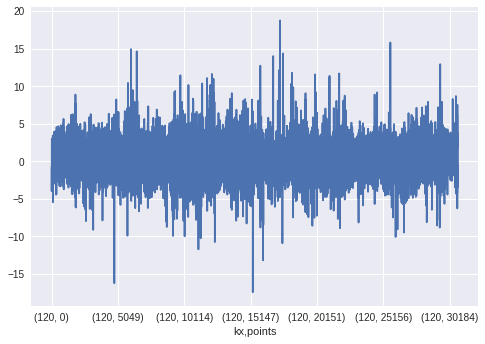

In [32]:
df_t120['omf'].loc[df_t120_iuse == 1].plot()

Altought in the figure we can see that some indices shows greater values of `omf` (e.g., greater than +/- 10), we cannot figure out where nor at what level those observations are. In the next sections, some built in plotting functions from the readDiag are introduced in order to facilitate this kind of analysis.

An alternative way to use select the columns of the Pandas dataframe is given below:

In [33]:
df_t120.loc[:,'omf']

kx   points
120  0        -0.785228
     1        -3.986862
     2        -3.529222
     3        -3.491445
     4        -3.333173
                 ...   
     30751     1.432701
     30752     2.843098
     30753     7.515910
     30754     0.165799
     30755     1.736573
Name: omf, Length: 30756, dtype: float32

## Making spatial plots using the readDiag built-in functions

Until here, all methods and functions from the readDiag package have been used to explore some information from the provided conventional GSI diagnostic file trough an appropriated data structure. The readDiag package ships with some built-in functions that leverage the its capability to explore data by creating spatial plots. 

These functions are:

* `ptmap()`: this function plots the selected observation for the selected kinds;
* `pvmap()`: this function plots the selected observations without specifying its kinds. It used the flag iuse instead;
* `plot()`: this function makes a plot for the selected observation by using information of the following columns available within the dataframe.

Use the built-in function `ptmap()` to plot the spatial distribution of some observation by type (`kx`). Remember to use the docstring to get an overview of its usage:

In [34]:
print(file.ptmap.__doc__)


        The ptmap function plots the selected observation for the selected kinds.

        Example:
        a.ptmap('uv', [290, 224, 223])
        
        In the above example, a plot for the wind (uv) for the kinds 290 (ASCATW), 224 (VADWND) and 223 (PROFLR) will be made.

        Note: If no kind is explicity informed, all kinds for that particular observation will be considered, which may clutter
        the plot.
        


CPU times: user 16.6 s, sys: 25.8 ms, total: 16.6 s
Wall time: 16.6 s


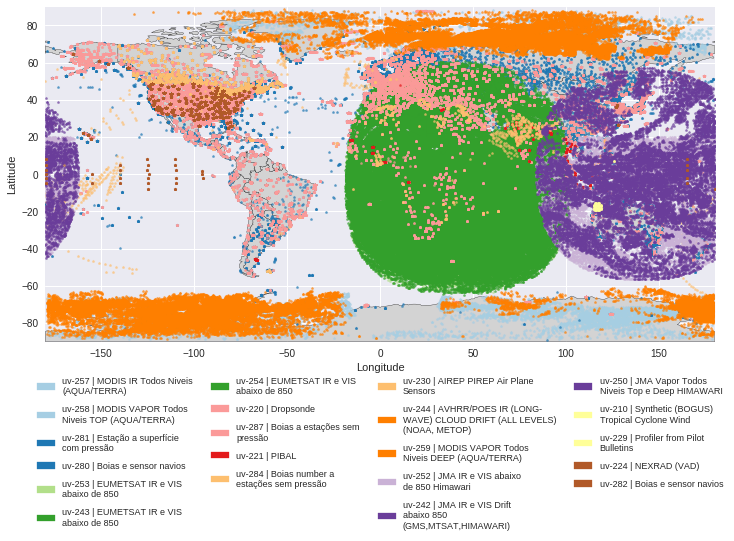

In [35]:
%%time

file.ptmap('uv')

As the built-in function `ptmap()` uses the information about the observation and its kind, it is also possible to pass a list of `kx` related to that observation type (this also helps to unclutter the plot and takes significantly less time to get the plot the figure). Remember that you can use the built-in function `pfileinfo()` to retrieve the `kx` of each existing observation:

CPU times: user 2.75 s, sys: 11.9 ms, total: 2.76 s
Wall time: 2.76 s


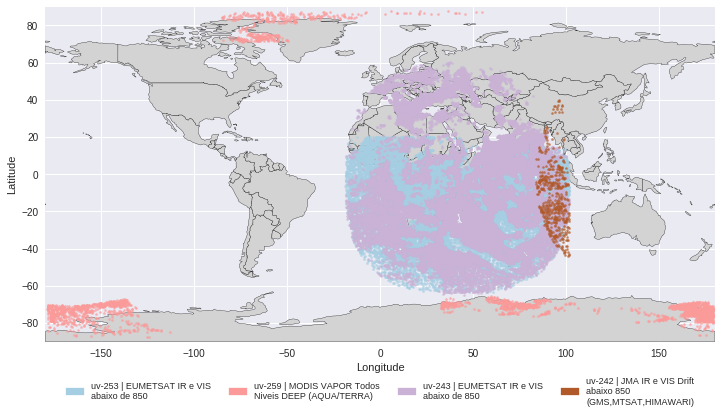

In [36]:
%%time

file.ptmap('uv', [253, 259, 243, 242])

Another interesting built-in function is the function `pvmap()` which plots the spatial distribution of different observations considering all the kinds for a given observation. In this case, it is needed to specify the `iuse` flag of the observation to be plotted, i.e., `iuse = 1` for used and `iuse = -1` for monitored. The statuses of the observations must be passed as a list with at least one element:

In [37]:
print(file.pvmap.__doc__)


        The pvmap function plots the selected observations without specifying its kinds. It used the flag iuse instead. 

        Example:
        a.pvmap(['uv','ps','t','q'], mask='iuse==1')
        
        In the above example, a plot for the used (iuse=1) observations of wind (uv), surface pressure (ps), temperature (t) and moisture (q) will be made. 
        


CPU times: user 9.9 s, sys: 24 ms, total: 9.93 s
Wall time: 9.91 s


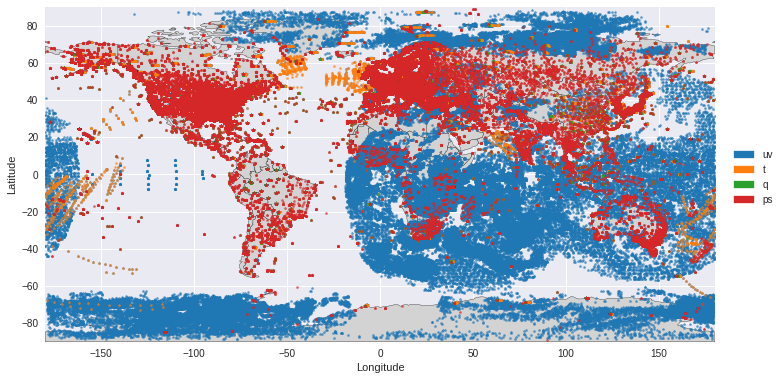

In [38]:
%%time

file.pvmap(['uv','ps','t','q'], mask='iuse==1')

The built-in funtion `plot` plots the spatial distribution of variables using one of the columns of the dataframe. In the example below, we made a plot for the values (when the column `obs` is used) of the used surface pressure observations of the kind 187:

In [39]:
print(file.plot.__doc__)


        The plot function makes a plot for the selected observation by using information of the following columns available within the dataframe.
 
        Available columns to be used with the plot function:

        lat  : All latitudes from the selected kinds 
        lon  : All longitudes from the selected kinds
        prs  : Pressure level of the observation
        lev  : Pressure levels of the observation 
        time : Time of the observation (in minutes, relative to the analysis time)
        idqc : Quality control mark or event mark 
        iuse : Use flag (use = 1; monitoring = -1)
        iusev: Value of the flag used in the analysis
        obs  : Observation value

        Example:
        gd.plot('ps', 187, 'obs', mask='iuse == 1')
        
        In the above example, a plot will be made displaying by using the values of the used surface pressure observations of the kind 187 (ADPSFC).
 
        


CPU times: user 2.22 s, sys: 3.63 ms, total: 2.23 s
Wall time: 2.22 s


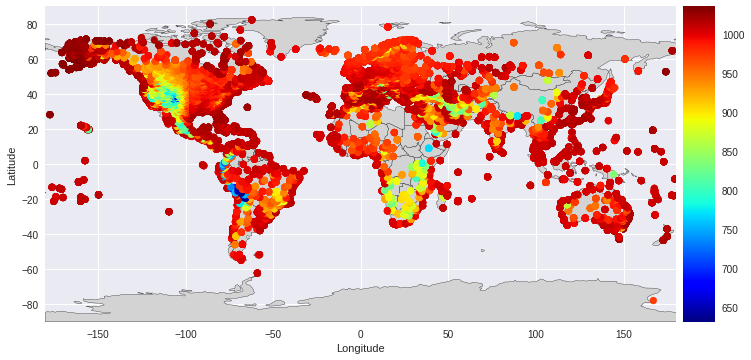

In [40]:
%%time 

file.plot('ps', 187, 'obs', mask='iuse==1',legend=True)

As final step, in order to release the memory used to hold the binary file, use the `close` method, which should return `0` when the file is correctly closed:

In [41]:
file.close()

0